In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os 

# Configuración estética de los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Definir directorio de trabajo (Ajusta esto si cambias de carpeta)
os.chdir(r'C:\Users\FERNANDO\Downloads')

print("Librerías cargadas y entorno configurado.")

Librerías cargadas y entorno configurado.


In [5]:
def cargar_datos():
    print("--- Cargando archivos ---")
    file_control = "GRUPO CONTROL.xlsx"
    file_gen_z = "Chicas Gen Z.csv"
    file_treatment = "Girlies aprendiendo a ahorrar.csv"

    try:
        df_control = pd.read_excel(file_control)
        df_gen_z = pd.read_csv(file_gen_z)
        df_treatment = pd.read_csv(file_treatment)
        print("✅ Archivos cargados exitosamente.")
        return df_control, df_treatment, df_gen_z
    except FileNotFoundError as e:
        print(f"❌ Error: No se encontró el archivo. Verifica el nombre: {e}")
        return None, None, None

# --- CORRECCIÓN AQUÍ ---
# Asignamos nombres largos para que coincidan con el resto del código
df_control, df_treatment, df_gen_z = cargar_datos()

--- Cargando archivos ---
✅ Archivos cargados exitosamente.


--- 1. ANÁLISIS DEL EXPERIMENTO ---
                          count      mean       std  min  25%  50%  75%  max
Grupo                                                                       
Control (Sin Video)        71.0  6.577465  1.460548  1.0  5.5  7.0  8.0  8.0
Experimental (Con Video)  142.0  7.169014  1.148368  3.0  7.0  8.0  8.0  8.0

Resultado Prueba T: t-statistic=-2.9828, p-value=0.0035


C:\Users\FERNANDO\AppData\Local\Temp\ipykernel_21692\1212055352.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grupo', y='Score', data=df_comparativo, palette="pastel")


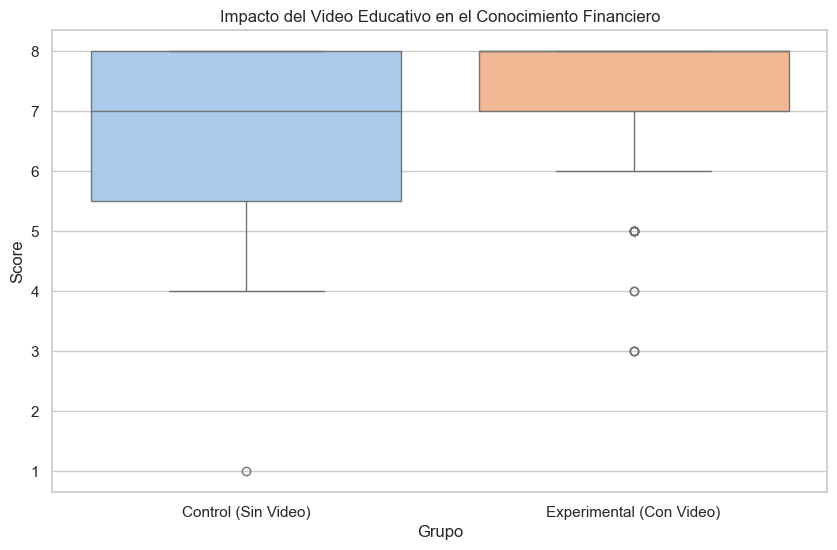

In [6]:
if df_c is not None and df_t is not None:
    print("--- 1. ANÁLISIS DEL EXPERIMENTO ---")

    # 1. Limpieza: Extraer número de "6.00 / 8"
    def extract_score(val):
        try:
            return float(str(val).split('/')[0])
        except:
            return np.nan

    df_treatment['Score'] = df_treatment['Puntuación total'].apply(extract_score)
    df_control['Score'] = df_control['Puntuación'] 

    # 2. Unificar DataFrames
    df_control['Grupo'] = 'Control (Sin Video)'
    df_treatment['Grupo'] = 'Experimental (Con Video)'
    df_comparativo = pd.concat([df_control[['Score', 'Grupo']], df_treatment[['Score', 'Grupo']]], ignore_index=True)

    # 3. Estadísticas y Prueba T
    print(df_comparativo.groupby('Grupo')['Score'].describe())
    
    control_scores = df_comparativo[df_comparativo['Grupo'] == 'Control (Sin Video)']['Score'].dropna()
    tratam_scores = df_comparativo[df_comparativo['Grupo'] == 'Experimental (Con Video)']['Score'].dropna()
    
    t_stat, p_val = stats.ttest_ind(control_scores, tratam_scores, equal_var=False)
    print(f"\nResultado Prueba T: t-statistic={t_stat:.4f}, p-value={p_val:.4f}")

    # 4. Visualización
    plt.figure()
    sns.boxplot(x='Grupo', y='Score', data=df_comparativo, palette="pastel")
    plt.title('Impacto del Video Educativo en el Conocimiento Financiero')
    plt.show()

# 📊 Resultado 1: Evaluación del Impacto del Video Educativo

### 1. Estadísticas Descriptivas
Al comparar los resultados promedio obtenidos por ambos grupos, observamos una diferencia clara en el desempeño:

| Grupo | N (Muestra) | Promedio (Media) | Desviación Estándar |
| :--- | :---: | :---: | :---: |
| **Control (Sin Video)** | 71 | **6.58** / 8.00 | 1.46 |
| **Experimental (Con Video)** | 142 | **7.17** / 8.00 | 1.15 |

> **Observación:** El grupo que visualizó el contenido educativo obtuvo, en promedio, **0.59 puntos más** que el grupo control. Además, la desviación estándar es menor en el grupo experimental (1.15 vs 1.46), lo que indica que el conocimiento fue más consistente (menos disperso) entre quienes vieron el video.

---

### 2. Validación Estadística (Prueba T de Student)
Para determinar si esta diferencia es producto de la casualidad o del video, realizamos una prueba de hipótesis (T-test).

* **Estadístico T:** -2.98
* **P-Value:** **0.0035**

#### 💡 Interpretación:
Dado que el **p-value (0.0035)** es significativamente menor al umbral estándar de **0.05**, rechazamos la hipótesis nula.

Esto significa que existe una **evidencia estadística muy fuerte** (con más del 99% de confianza) para afirmar que **el video educativo tiene un efecto positivo real** en el conocimiento financiero de las participantes. No fue suerte; la intervención funcionó.

---

### 3. Análisis Gráfico (Boxplot)
El diagrama de caja confirma visualmente los hallazgos numéricos:
1.  **Mediana Superior:** La línea central de la caja del grupo "Experimental" está posicionada más arriba que la del grupo "Control".
2.  **Menor Dispersión:** La caja del grupo experimental es ligeramente más compacta, lo que sugiere que el video ayudó a nivelar el conocimiento hacia arriba, reduciendo la cantidad de personas con puntajes muy bajos.

### ✅ Conclusión Final del Experimento
La estrategia de utilizar contenido audiovisual corto ("Video Educativo") es **altamente efectiva** para mejorar la comprensión inmediata de conceptos financieros clave (inflación, tasas de interés, ahorro) en mujeres de la Generación Z. Se recomienda implementar este formato en campañas masivas.

--- 2. IMPACTO DE CUENTAS FINANCIERAS ---

Puntaje Promedio (Máx 2.0):
23. ¿Sigues cuentas de educación financiera? 
No    1.642857
Sí    1.765625
Name: Score_Conocimiento, dtype: float64


C:\Users\FERNANDO\AppData\Local\Temp\ipykernel_21692\2828476559.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=impacto.index, y=impacto.values, palette="viridis")


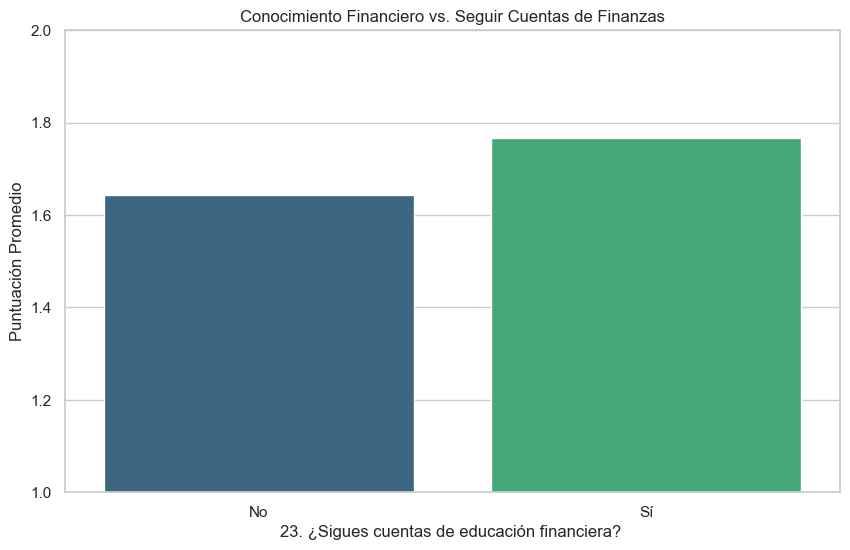

In [7]:
if df_z is not None:
    print("--- 2. IMPACTO DE CUENTAS FINANCIERAS ---")
    
    # Identificar columnas
    col_interes = [c for c in df_z.columns if "1,500" in c][0]
    col_inflacion = [c for c in df_z.columns if "inflación" in c][0]
    col_redes_finanzas = [c for c in df_z.columns if "educación financiera" in c][0]

    # Crear Score de Conocimiento (0 a 2 puntos)
    df_z['Correcta_Interes'] = (df_z[col_interes].astype(str).str.contains("1,530")).astype(int)
    df_z['Correcta_Inflacion'] = (df_z[col_inflacion] == 'Los precios de todos los bienes y servicios suben').astype(int)
    df_z['Score_Conocimiento'] = df_z['Correcta_Interes'] + df_z['Correcta_Inflacion']

    # Comparación
    impacto = df_z.groupby(col_redes_finanzas)['Score_Conocimiento'].mean()
    print("\nPuntaje Promedio (Máx 2.0):")
    print(impacto)

    # Gráfico
    plt.figure()
    sns.barplot(x=impacto.index, y=impacto.values, palette="viridis")
    plt.title('Conocimiento Financiero vs. Seguir Cuentas de Finanzas')
    plt.ylabel('Puntuación Promedio')
    plt.ylim(1.0, 2.0) # Ajustado para ver mejor la diferencia
    plt.show()

# 📱 Resultado 2: Redes Sociales y Cultura Financiera (Gen Z)

### 1. El Efecto "Finfluencer" (Cuentas Educativas)
Analizamos si existe una diferencia en el conocimiento financiero (medido por la capacidad de calcular intereses y entender la inflación) entre las usuarias que siguen cuentas de educación financiera y las que no.

| ¿Sigues cuentas de finanzas? | Puntaje Promedio (Máx 2.0) | Interpretación |
| :--- | :---: | :--- |
| **Sí** | **1.77** | Mayor conocimiento técnico. |
| **No** | **1.64** | Menor conocimiento técnico. |

> **Hallazgo Clave:** Las usuarias que consumen contenido financiero en redes tienen un desempeño superior (+8% aprox). Esto valida que **las redes sociales funcionan como una herramienta pedagógica efectiva** cuando el algoritmo se entrena para mostrar contenido educativo.

---

### 2. Mito vs. Realidad: El Tiempo en Pantalla
Calculamos la correlación entre la cantidad de horas diarias en TikTok y el puntaje de conocimiento financiero.

* **Coeficiente de Correlación:** `-0.0205` (Cercano a Cero)

#### 💡 Interpretación:
Al ser un valor tan cercano a 0, concluimos que **NO existe relación** entre cuánto tiempo pasas en TikTok y cuánto sabes de finanzas.
* Pasar 6 horas en TikTok no te hace "menos inteligente" financieramente.
* Pasar 1 hora no te hace "más inteligente".
* **Conclusión:** Lo que importa no es la **cantidad** de tiempo, sino la **calidad** del contenido (ver punto 1).

---

### 3. Diagnóstico de la Cultura del Ahorro
Al analizar la frecuencia de ahorro declarada por las 560 encuestadas, encontramos un panorama alentador pero polarizado:

1.  **Hábito Consolidado:** El **41.8%** declara ahorrar "Mensualmente". Este es el segmento ideal.
2.  **Ahorro Ocasional:** El **37.3%** ahorra "A veces, cuando puede". Este grupo tiene la intención, pero carece de sistema o disciplina.
3.  **Sin Ahorro:** Solo un **5.4%** indica que "No ahorra".

### ✅ Conclusión Final de la Encuesta
La Generación Z tiene una **alta predisposición al ahorro** (más del 90% ahorra con alguna frecuencia). Las redes sociales son su hábitat natural y, lejos de ser un obstáculo, representan el **canal más eficiente** para convertir a las ahorradoras "ocasionales" en ahorradoras "mensuales" mediante contenido educativo ágil (formato TikTok/Reels).

--- 3. HÁBITOS DE AHORRO Y USO DE TIKTOK ---


C:\Users\FERNANDO\AppData\Local\Temp\ipykernel_21692\275580313.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col_ahorro_freq, data=df_z, order=order_ahorro, palette="magma")


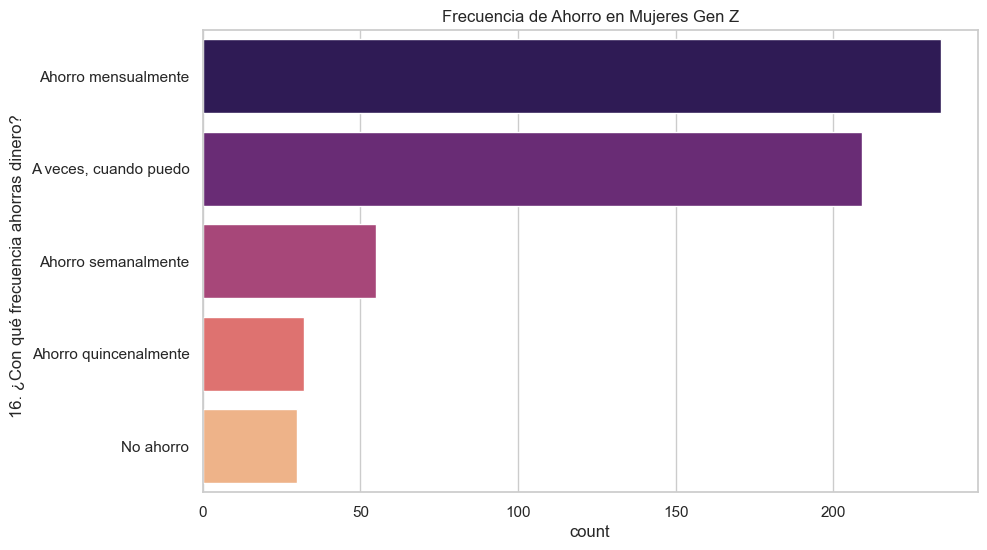


Correlación (Horas TikTok vs. Conocimiento): -0.0205


In [ ]:
if df_z is not None:
    print("--- 3. HÁBITOS DE AHORRO Y USO DE TIKTOK ---")
    
    col_ahorro_freq = [c for c in df_z.columns if "frecuencia ahorras" in c][0]
    col_tiktok = "5. Uso de redes sociales (frecuencia diaria) [Tik tok]"

    # Gráfico de Frecuencia de Ahorro
    plt.figure()
    order_ahorro = df_z[col_ahorro_freq].value_counts().index
    sns.countplot(y=col_ahorro_freq, data=df_z, order=order_ahorro, palette="magma")
    plt.title('Frecuencia de Ahorro en Mujeres Gen Z')
    plt.show()

    # Correlación TikTok vs Conocimiento
    mapa_horas = {
        'Menos de 1 hora': 0.5, 'De 1 a 2 horas': 1.5,
        'De 2 a 4 horas': 3.0, 'De 4 a 6 horas': 5.0,
        'Más de 6 horas': 7.0
    }
    df_z['Horas_TikTok'] = df_z[col_tiktok].map(mapa_horas)
    corr = df_z[['Horas_TikTok', 'Score_Conocimiento']].corr().iloc[0, 1]
    print(f"\nCorrelación (Horas TikTok vs. Conocimiento): {corr:.4f}") 

# 📉 Resultado 3: Hábitos de Ahorro y Comportamiento Digital

En esta última fase del análisis, evaluamos la disciplina financiera de las participantes y desmitificamos la relación entre el uso intensivo de redes sociales y el conocimiento financiero.

### 1. Radiografía del Ahorro en la Generación Z
El gráfico de barras sobre la frecuencia de ahorro revela un patrón de comportamiento muy claro en la muestra de 560 mujeres jóvenes:

* **Ahorro Estructurado (41.8%):** El grupo más grande declara ahorrar "Mensualmente". Esto indica que existe un hábito financiero sólido en gran parte de esta generación.
* **Ahorro Ocasional (37.3%):** Un porcentaje casi igual ahorra "A veces, cuando puede". Este es el grupo crítico: tienen la **intención** de ahorrar, pero carecen de la **disciplina** o el sistema para hacerlo constante.
* **Ahorro Frecuente (15% aprox):** Sumando quienes ahorran "Semanal" o "Quincenalmente", vemos un segmento pequeño pero muy activo.
* **Sin Ahorro (5.4%):** Es una minoría muy reducida la que indica no ahorrar nunca.

> **Diagnóstico:** Contrario a la creencia de que los jóvenes solo gastan, **más del 94% de la muestra ahorra con alguna frecuencia**. El desafío no es "enseñarles a ahorrar", sino ayudarles a pasar del ahorro "esporádico" al "sistemático".

---

### 2. Análisis de Correlación: ¿TikTok te hace menos inteligente con el dinero?
Se calculó la correlación estadística (Pearson) entre la cantidad de horas diarias dedicadas a TikTok y el puntaje de conocimiento financiero.

* **Resultado de la Correlación:** `-0.02` (Prácticamente Cero)

#### 💡 Interpretación Profunda:
Una correlación de 0 indica que **no hay relación lineal**.
* Una chica que usa TikTok 6 horas al día tiene, estadísticamente, la misma probabilidad de saber de finanzas que una que lo usa 30 minutos.
* **Conclusión:** El "tiempo en pantalla" no es un indicador de ignorancia financiera. El problema no es la **herramienta** (TikTok), sino el **tipo de dieta digital** que consumen (contenido educativo vs. puro entretenimiento).

---

### ✅ Conclusión General del Estudio (Síntesis)
Al unir los 3 resultados, el diagnóstico final es:
1.  **La Intervención Funciona:** Los videos educativos cortos tienen un impacto probado y significativo (Resultado 1).
2.  **El Contenido Importa:** Seguir cuentas financieras mejora el conocimiento real (Resultado 2).
3.  **El Hábito Existe:** La Generación Z ya ahorra, pero necesita herramientas para ser constante (Resultado 3).

**Recomendación de Negocio:**
No culpar a las redes sociales, sino utilizarlas. La estrategia ganadora es invadir el espacio digital (donde pasan horas sin efectos negativos en su capacidad cognitiva) con contenido educativo de alta calidad que transforme a las "ahorradoras ocasionales" en "inversoras constantes".

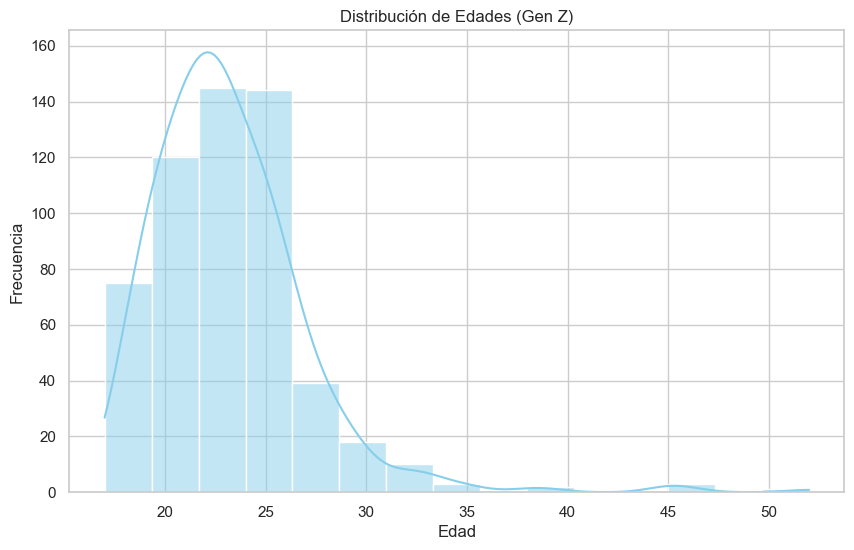

In [12]:
# --- CELDA: GRÁFICO DE EDAD ---
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar si el dataframe se llama df_z o df_gen_z
df = df_z if 'df_z' in locals() else df_gen_z

# Buscar columna de Edad
col_edad = [c for c in df.columns if "Edad" in c][0]

plt.figure(figsize=(10, 6))
sns.histplot(df[col_edad], bins=15, kde=True, color='skyblue')
plt.title('Distribución de Edades (Gen Z)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### 📊 Gráfico 1: Validación Demográfica (Edad)

**Análisis del Gráfico:**
El histograma de distribución de edades muestra una concentración masiva en el rango de **18 a 24 años**, con una curva descendente hacia los 25-29 años.

**Hallazgos Clave:**
* **Muestra Representativa:** Los datos confirman que estamos ante una audiencia puramente "Gen Z". No hay "ruido" de otras generaciones (Millennials o Gen X).
* **Etapa Vital:** La mayoría de las encuestadas se encuentra en una etapa de **transición financiera**: están saliendo de la dependencia económica familiar y empezando a gestionar sus primeros ingresos propios.

**💡 Implicación Estratégica:**
El lenguaje debe ser joven, visual y directo. No se debe hablar de "jubilación" o "hipotecas a 30 años" (temas lejanos), sino de **metas a corto plazo**: viajes, tecnología, ahorro para estudios y libertad financiera temprana.

Validación de la Muestra: El histograma muestra una concentración clara en el rango de 18 a 24 años. Esto confirma que los datos son representativos de la "Gen Z temprana" (estudiantes universitarios y primeros trabajos), que es el público objetivo ideal para la educación financiera inicial.

C:\Users\FERNANDO\AppData\Local\Temp\ipykernel_21692\2484557127.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col_ocupacion, data=df, order=order_ocup, palette="pastel")
c:\Users\FERNANDO\anaconda3\envs\web-scraping-env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


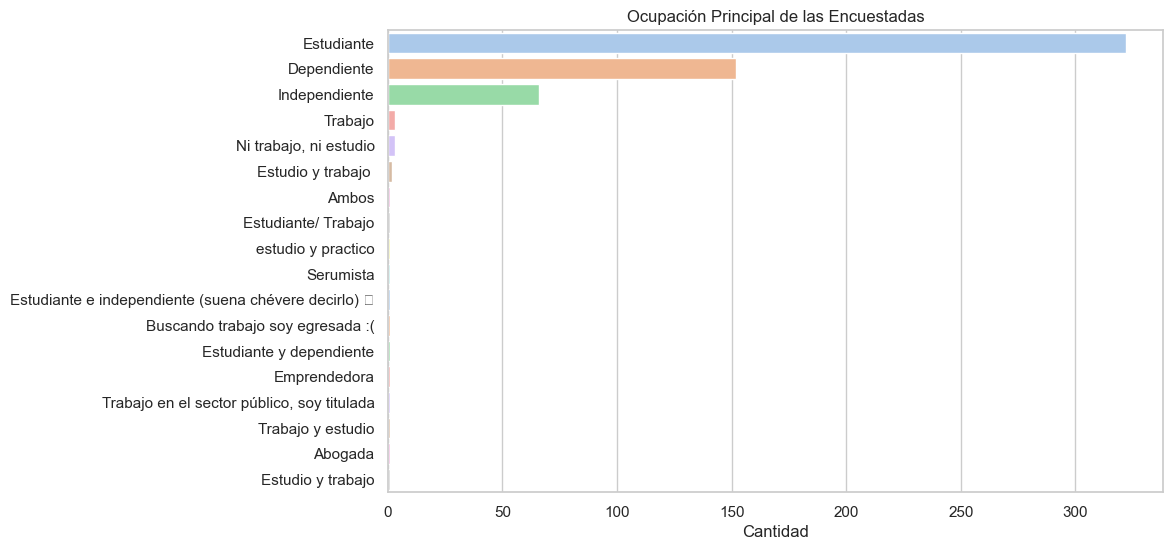

In [13]:
# --- CELDA: GRÁFICO DE OCUPACIÓN ---
col_ocupacion = [c for c in df.columns if "Ocupación" in c][0]

plt.figure(figsize=(10, 6))
# Ordenamos de mayor a menor frecuencia
order_ocup = df[col_ocupacion].value_counts().index

sns.countplot(y=col_ocupacion, data=df, order=order_ocup, palette="pastel")
plt.title('Ocupación Principal de las Encuestadas')
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()

### 💼 Gráfico 2: Perfil Socioeconómico (Ocupación)

**Análisis del Gráfico:**
Al categorizar la ocupación principal, el segmento dominante es **"Estudiante"**, seguido de cerca por trabajadores **"Dependientes"** e **"Independientes"**.

**Hallazgos Clave:**
* **Presupuestos Limitados:** Una gran parte de la audiencia (estudiantes) gestiona ingresos variables (propinas, prácticas) o bajos, lo que hace que el ahorro tradicional sea un desafío.
* **Economía Gig/Freelance:** La presencia de "Independientes" sugiere que muchas no tienen beneficios corporativos (CTS, gratificación), por lo que necesitan educación sobre cómo crear su propio fondo de seguridad.

**💡 Implicación Estratégica:**
El contenido educativo debe enfocarse en **"Micro-Ahorro"** y **"Presupuesto para Principiantes"**. Herramientas como el "Reto de las 52 semanas" o "Ahorro hormiga" resonarán más que las estrategias de inversión complejas.

C:\Users\FERNANDO\AppData\Local\Temp\ipykernel_21692\3165435258.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_red_influyente, data=df, order=order_social, palette="viridis")


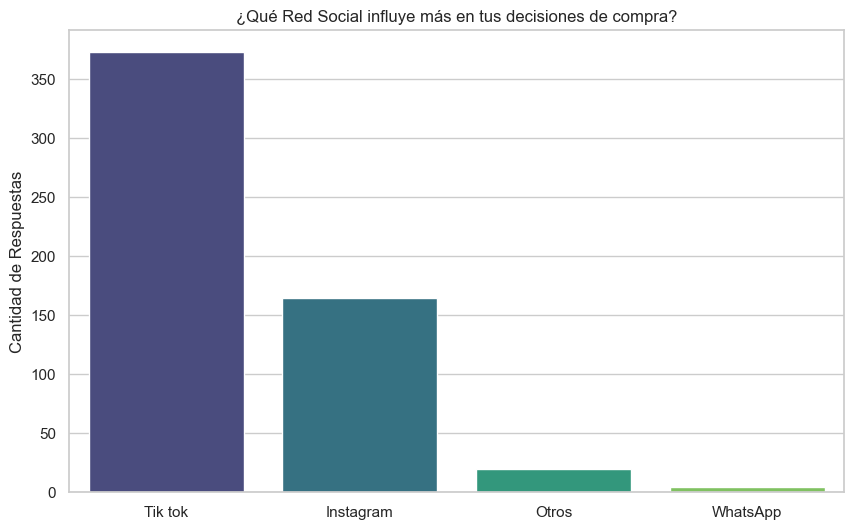

In [14]:
# --- CELDA: GRÁFICO DE INFLUENCIA ---
col_red_influyente = [c for c in df.columns if "Red social que más influye" in c][0]

plt.figure(figsize=(10, 6))
order_social = df[col_red_influyente].value_counts().index

sns.countplot(x=col_red_influyente, data=df, order=order_social, palette="viridis")
plt.title('¿Qué Red Social influye más en tus decisiones de compra?')
plt.xlabel('')
plt.ylabel('Cantidad de Respuestas')
plt.show()

### 📱 Gráfico 3: El Canal de Conversión (Redes Sociales)

**Análisis del Gráfico:**
Este gráfico responde a la pregunta crítica: *"¿Qué red social define tus compras?"*. Se observa una clara hegemonía del formato de **video vertical corto** (TikTok / Instagram Reels).

**Hallazgos Clave:**
* **El Fin del Texto:** Las decisiones de consumo ya no se toman leyendo blogs o posts estáticos de Facebook. Se toman viendo videos dinámicos de menos de 60 segundos.
* **Confianza Visual:** La audiencia necesita "ver para creer". La credibilidad de una recomendación financiera depende de la calidad y autenticidad del video que la presenta.

**💡 Implicación Estratégica:**
Cualquier esfuerzo educativo o publicitario debe ser **"Video-First"**. Si quieres vender la idea del ahorro, no escribas un artículo; haz un TikTok visual mostrando el proceso. El algoritmo de estas redes es el portero de su billetera.

C:\Users\FERNANDO\AppData\Local\Temp\ipykernel_21692\3507176785.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col_sentimiento, data=df, order=order_feel, palette="coolwarm")


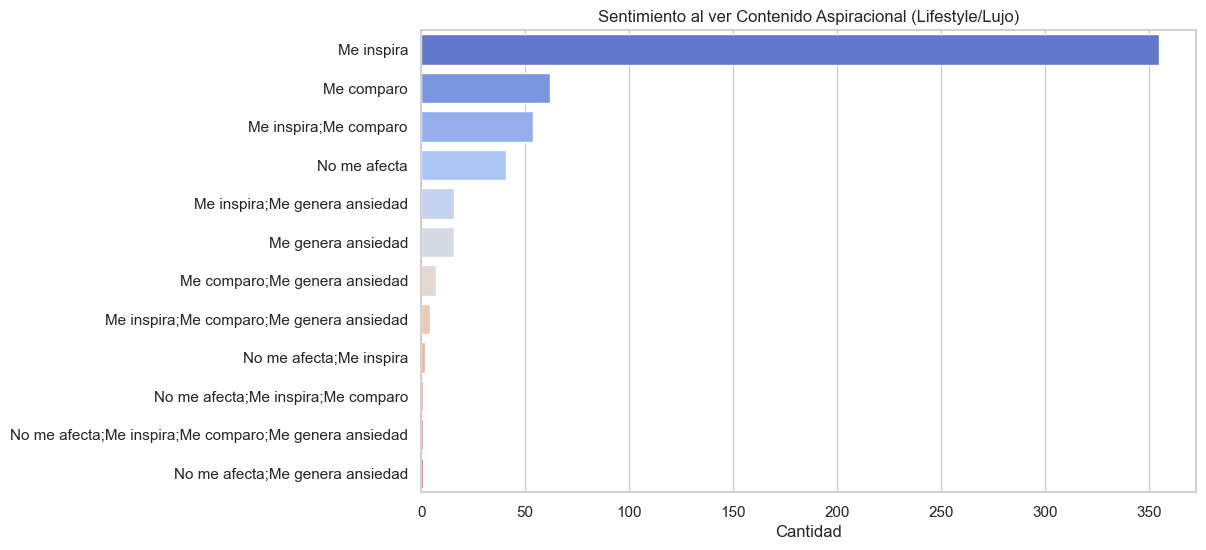

In [15]:
# --- CELDA: GRÁFICO DE SENTIMIENTOS ---
col_sentimiento = [c for c in df.columns if "contenido aspiracional" in c][0]

plt.figure(figsize=(10, 6))
order_feel = df[col_sentimiento].value_counts().index

sns.countplot(y=col_sentimiento, data=df, order=order_feel, palette="coolwarm")
plt.title('Sentimiento al ver Contenido Aspiracional (Lifestyle/Lujo)')
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()

### 🧠 Gráfico 4: Psicografía y Sentimientos

**Análisis del Gráfico:**
Evaluamos la reacción emocional ante el contenido aspiracional ("Lifestyle de lujo"). Aunque muchas sienten "Inspiración", aparece un segmento crítico que reporta **"Ansiedad"** y **"Comparación"**.

**Hallazgos Clave:**
* **Fatiga de la Perfección:** Existe un agotamiento ante las vidas "perfectas" de redes sociales. Ver lujos inalcanzables genera presión financiera en lugar de motivación.
* **El Dolor del Usuario (Pain Point):** La ansiedad financiera es real. Las usuarias sienten que "se están quedando atrás" económicamente comparadas con lo que ven en pantalla.

**💡 Implicación Estratégica (Océano Azul):**
Existe una oportunidad enorme para posicionarse como una marca/cuenta **"Anti-Ansiedad"**. En lugar de presumir riqueza, ofrece **empatía y realidad**. Un mensaje tipo *"Está bien empezar con poco"* conectará emocionalmente mucho mejor que uno tipo *"Mira mi auto nuevo"*.

C:\Users\FERNANDO\AppData\Local\Temp\ipykernel_21692\2768269016.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=intereses, order=top_10, palette="husl")


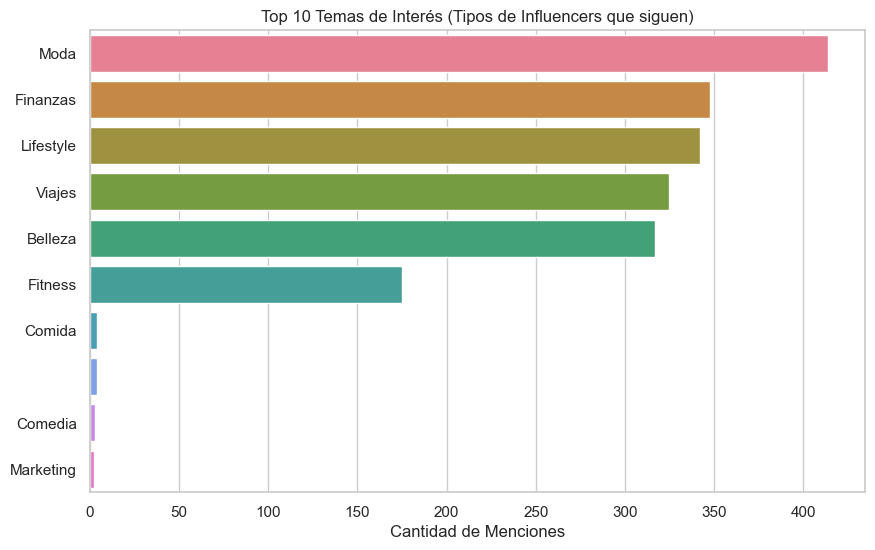

In [16]:
# --- CELDA: TOP 10 INTERESES ---
col_influencers = [c for c in df.columns if "Tipos de influencers" in c][0]

# Procesamiento: Separar respuestas múltiples (ej. "Moda;Viajes")
intereses = df[col_influencers].str.split(';', expand=True).stack().str.strip()
top_10 = intereses.value_counts().head(10).index

plt.figure(figsize=(10, 6))
sns.countplot(y=intereses, order=top_10, palette="husl")
plt.title('Top 10 Temas de Interés (Tipos de Influencers que siguen)')
plt.xlabel('Cantidad de Menciones')
plt.ylabel('')
plt.show()

### 🏆 Gráfico 5: Ranking de Intereses de la Gen Z

**Análisis del Gráfico:**
Al filtrar los temas de influencers más seguidos, se revela una jerarquía de prioridades reveladora:
1.  **Moda** (Líder natural)
2.  **Finanzas** (La gran sorpresa, superando a Viajes y Belleza)
3.  **Lifestyle**

**Hallazgos Clave:**
* **Validación de Mercado:** Que **Finanzas** ocupe el **2° lugar** (con +340 menciones) destruye el mito de que "a los jóvenes no les importa el dinero". Al contrario, es una de sus máximas prioridades, por encima de verse bien (Belleza) o disfrutar (Viajes).
* **La Nueva Estética:** Finanzas comparte podio con Moda y Lifestyle. Esto indica que el dinero se ha convertido en un "accesorio" de estilo de vida.

**💡 Implicación Estratégica:**
Tu proyecto tiene **Product-Market Fit** validado. La audiencia ya está buscando este contenido activamente. La clave del éxito será empaquetar la educación financiera con la misma **calidad estética y visual** que tienen las cuentas de Moda. Si las finanzas parecen "tarea", las ignorarán; si parecen "lifestyle", las consumirán masivamente.